# H1C IDR3.2 1$\mu$s Ripple

In [1]:
import h5py
import numpy as np

from ipywidgets import interact

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# configure matplotlib
mpl.style.use("classic")

import sys
sys.path.append("/users/pkeller/code/ClosurePhaseAnalysis/")
from library import dspec

In [11]:
# data path
path = "/lustre/aoc/projects/hera/pkeller/data/H1C_IDR3.2/sample/EQ14_FC_B2_XPS.h5"

# load data
with h5py.File(path, "r") as f:
    lst = f["LST"][()]
    xps_xx = f["XPS XX"][()]
    xps_yy = f["XPS YY"][()]
    err_xx = f["ERR XX"][()]
    err_yy = f["ERR YY"][()]
    w_xx = f["weights XX"][()]
    w_yy = f["weights YY"][()]
delay = dspec.delay(n=xps_xx.shape[-1])

## Incoherent Averaging across LST

In [6]:
xps_xx_avg = np.moveaxis((np.moveaxis(xps_xx, -1, 0) * w_xx).sum(axis=-1) / w_xx.sum(axis=2), 0, -1)
xps_yy_avg = np.moveaxis((np.moveaxis(xps_yy, -1, 0) * w_yy).sum(axis=-1) / w_yy.sum(axis=2), 0, -1)

## Diagonal Elements

In [9]:
xps_xx_diag = [xps_xx_avg[i, i] for i in range(xps_xx.shape[0])]
xps_yy_diag = [xps_yy_avg[i, i] for i in range(xps_yy.shape[0])]

## Plots

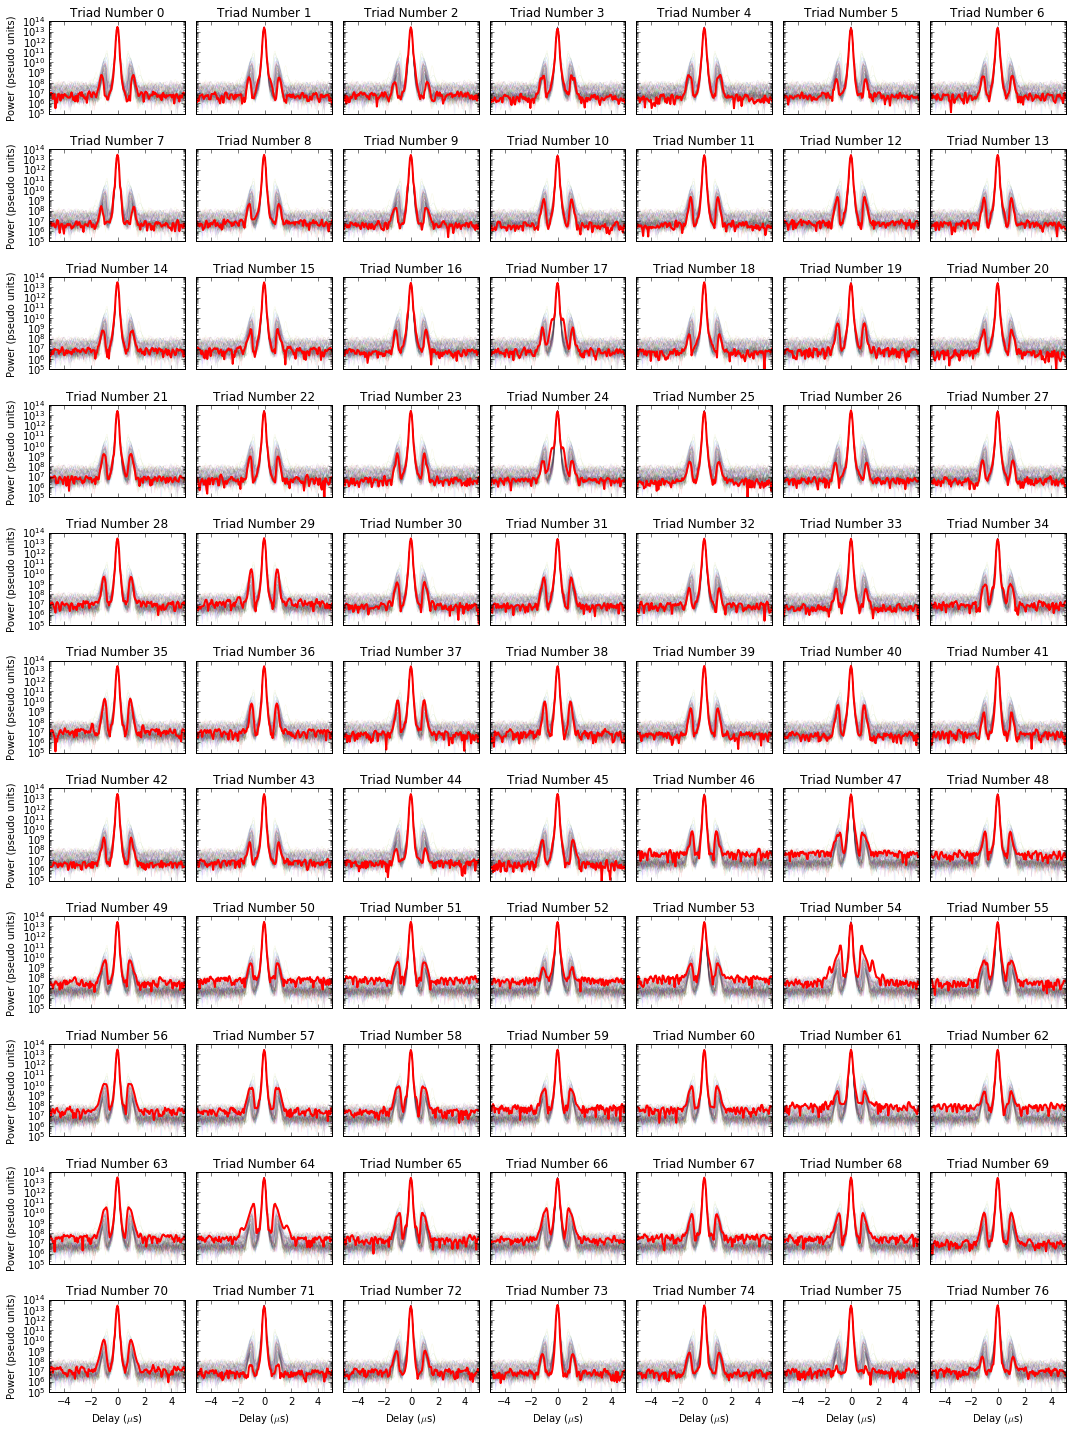

In [23]:
fig, ax = plt.subplots(11, 7, figsize=(15, 20), sharex=True, sharey=True)
for l in range(7):
    for k in range(11):
        for i in range(xps_xx.shape[0]):
            ax[k, l].plot(delay, np.abs(xps_xx_diag[i]), alpha=0.1, linewidth=0.5)
        ax[k, l].plot(delay, np.abs(xps_xx_diag[k * 7 + l]), color="red", linewidth=2)    
        ax[k, l].set_xlim([min(delay), max(delay)])
        ax[k, l].set_ylim([1e5, 1e14])
        ax[k, l].set_title(f"Triad Number {k * 7 + l}")
        ax[k, l].set_yscale("log")
        
        if k == 10:
            ax[k, l].set_xlabel(r"Delay ($\mu$s)", fontsize=10)
        if l == 0:
            ax[k, l].set_ylabel("Power (pseudo units)", fontsize=10)
            
plt.tight_layout()
plt.savefig("/users/pkeller/code/H1C_IDR3.2/nbooks/EQ14_FCB2/ripple_xx.png", dpi=150)

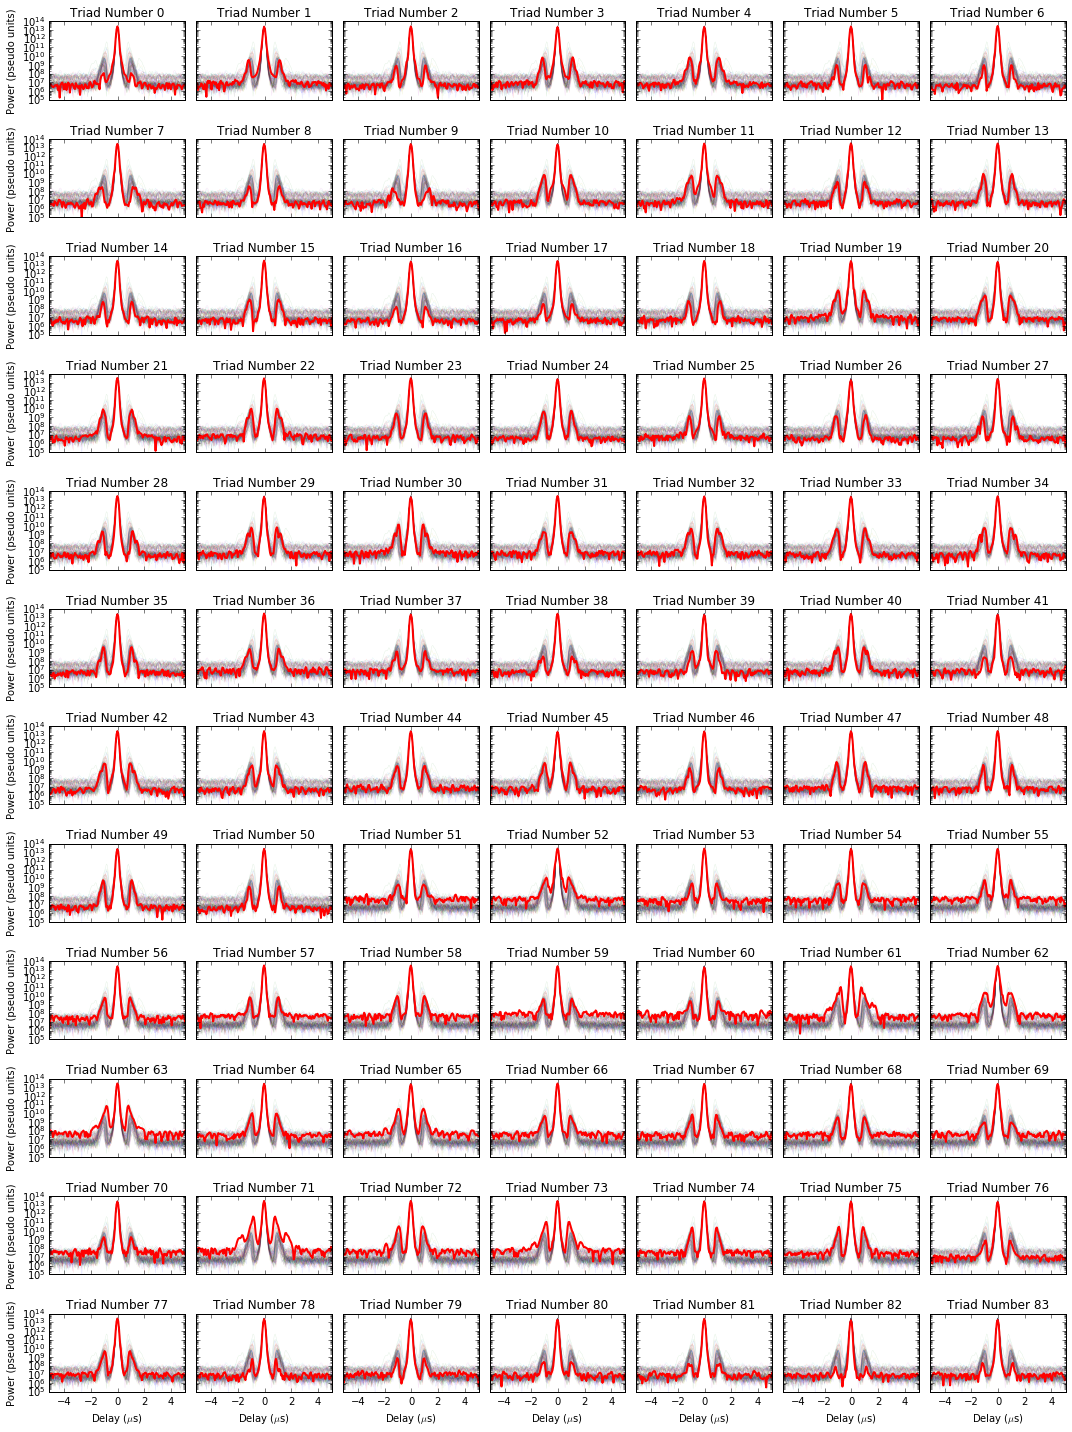

In [25]:
fig, ax = plt.subplots(12, 7, figsize=(15, 20), sharex=True, sharey=True)
for l in range(7):
    for k in range(12):
        for i in range(xps_yy.shape[0]):
            ax[k, l].plot(delay, np.abs(xps_yy_diag[i]), alpha=0.1, linewidth=0.5)
        ax[k, l].plot(delay, np.abs(xps_yy_diag[k * 7 + l]), color="red", linewidth=2)    
        ax[k, l].set_xlim([min(delay), max(delay)])
        ax[k, l].set_ylim([1e5, 1e14])
        ax[k, l].set_title(f"Triad Number {k * 7 + l}")
        ax[k, l].set_yscale("log")
        
        if k == 11:
            ax[k, l].set_xlabel(r"Delay ($\mu$s)", fontsize=10)
        if l == 0:
            ax[k, l].set_ylabel("Power (pseudo units)", fontsize=10)
            
plt.tight_layout()
plt.savefig("/users/pkeller/code/H1C_IDR3.2/nbooks/EQ14_FCB2/ripple_yy.png", dpi=150)